In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
%matplotlib inline


In [2]:
df = pd.read_table("../data/australian.csv", sep='\s+', header=None)

In [3]:
y = df[14]
X = df.drop(columns = 14)
y.value_counts()

0    383
1    307
Name: 14, dtype: int64

In [4]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size = 0.8)

In [5]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)


# View accuracy score
accuracy_score(y_test, y_pred_test, normalize=True)
print(classification_report(y_test, y_pred_test))

rf_probs = forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('RandF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       306
           1       0.85      0.84      0.84       246

    accuracy                           0.86       552
   macro avg       0.86      0.86      0.86       552
weighted avg       0.86      0.86      0.86       552

RandF: ROC AUC=0.925


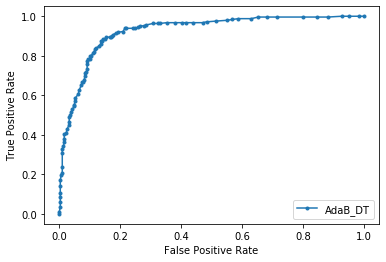

In [7]:
# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='AdaB_DT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()